### Objective of the EDA:

The objective of this EDA is to determine which group of customers (based on gender, age, occupation, and city) are the highest spenders in the store. By identifying these high-paying customer segments, the store can tailor marketing strategies and promotional offers to increase the proportion of high-paying customers and boost overall revenue.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# Check the basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


First, I opened the data set to understand what kind of information it contains. I looked at the number of rows and columns to get an idea of its size, and checked if there were any missing values in the data.

In [ ]:
# Convert some columns to proper data types and fill missing values with 0

df['User_ID'] = df['User_ID'].astype(object)
df['Occupation'] = df['Occupation'].astype(object)
df['Marital_Status'] = df['Marital_Status'].astype(object)
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype(int).astype(object)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype(int).astype(object)

In [ ]:
# Check the changes made to the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category_1          550068 non-null  int64 
 9   Product_Category_2          550068 non-null  object
 10  Product_Category_3          550068 non-null  object
 11  Purchase                    550068 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 50.4+ MB


In this step, I made sure that all the information was in the correct format. This meant turning some types of data, like numbers, into different types, like categories. When I found blank cells in two specific categories (Product_Category_2 and Product_Category_3), I filled them with a 0 to ensure the data was complete and ready for further analysis.

In [ ]:
# Check the unique values in some columns

print(df['Gender'].unique())
print(df['Age'].unique())
print(df['Occupation'].unique())
print(df['City_Category'].unique())
print(df['Stay_In_Current_City_Years'].unique())
print(df['Marital_Status'].unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
[10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]


Here, I examined specific columns like Gender, Age, and City_Category to see the various values they contained. This helps me to get an idea of the diversity of the data, for instance, the number of male and female customers and the different types of city categories included.

In [ ]:
# Get the summary statistics of the dataset

print(df.describe())

       Product_Category_1       Purchase
count       550068.000000  550068.000000
mean             5.404270    9263.968713
std              3.936211    5023.065394
min              1.000000      12.000000
25%              1.000000    5823.000000
50%              5.000000    8047.000000
75%              8.000000   12054.000000
max             20.000000   23961.000000


<Axes: >

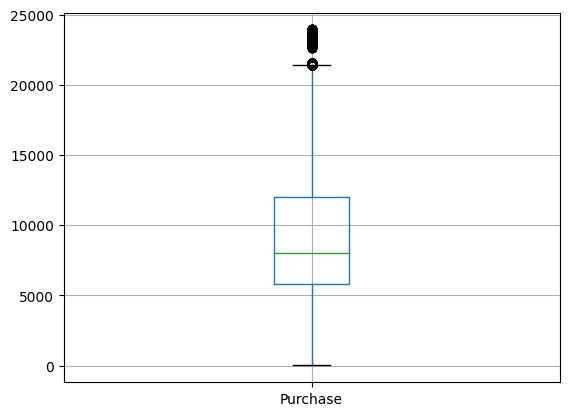

In [ ]:
# Check for outliers in the Purchase column using a box plot

df.boxplot(column=['Purchase'])

In this step, I looked at fundamental data points such as the average amount that customers spend and the range of spending patterns. The box plot assists in pinpointing any data points that are significantly higher or lower than the majority—also known as outliers.

In [ ]:
# Remove unnecessary product columns and group data by User_ID

df_filtered = df.drop(columns=['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'])

# Sum the purchases for each user

df_test = df_filtered.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years', 'Marital_Status']).agg(sum_purchase=('Purchase','sum')).reset_index()

In [ ]:
# Check the new dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   sum_purchase                5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 368.3+ KB


Here, I concentrated on understanding customer behavior instead of product information. I took out all the details related to products and focused on calculating the total spending for each customer.

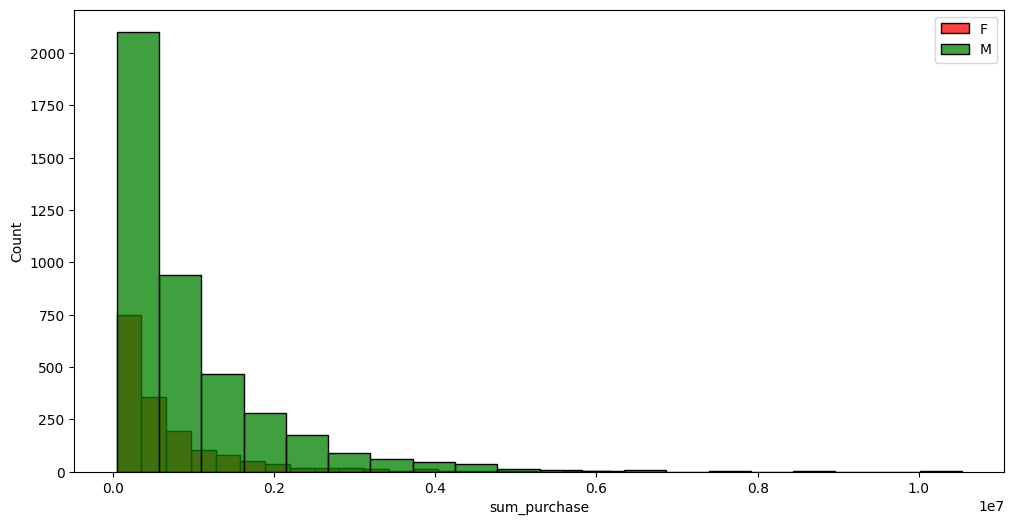

In [ ]:
# Plot a histogram of purchases by Gender
plt.figure(figsize=(12, 6))
sns.histplot(df_test.sum_purchase[df_test.Gender == 'F'], bins=20, color='r', label='F')
sns.histplot(df_test.sum_purchase[df_test.Gender == 'M'], bins=20, color='g', label='M')
plt.legend()
plt.show()

<ipython-input-16-b50477f8ff4e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Gender == 'F'], bins=20, color='r', label='F')
<ipython-input-16-b50477f8ff4e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Gender == 'M'], bins=20, colo

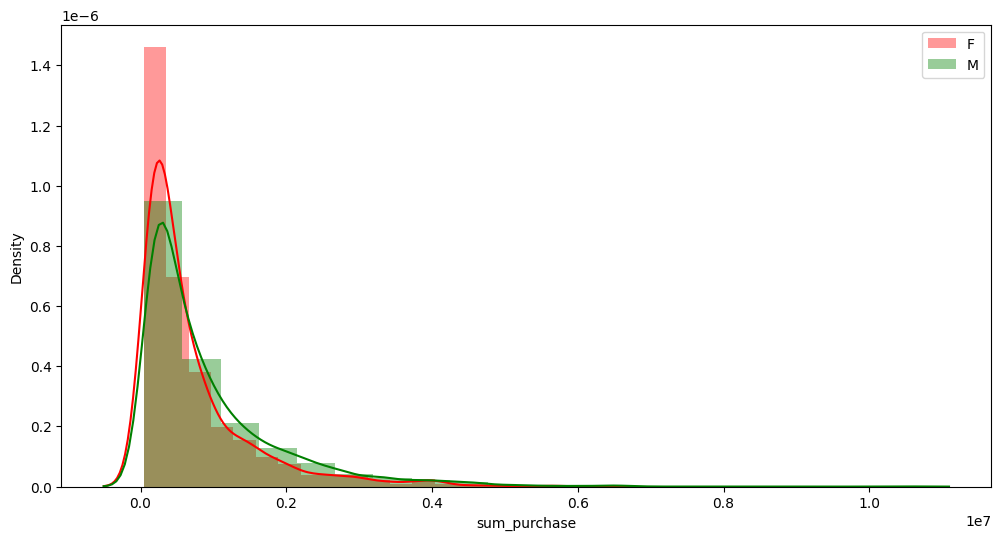

In [ ]:
# Distribution plot to compare Gender with Purchase
plt.figure(figsize=(12, 6))
sns.distplot(df_test.sum_purchase[df_test.Gender == 'F'], bins=20, color='r', label='F')
sns.distplot(df_test.sum_purchase[df_test.Gender == 'M'], bins=20, color='g', label='M')
plt.legend()
plt.show()

In this step, I created visual charts to compare how much men and women spend. The first chart provides a simple representation of the total spending by each gender. The second chart provides more detailed insights into the spending habits of both genders by indicating the probability of men and women spending particular amounts.

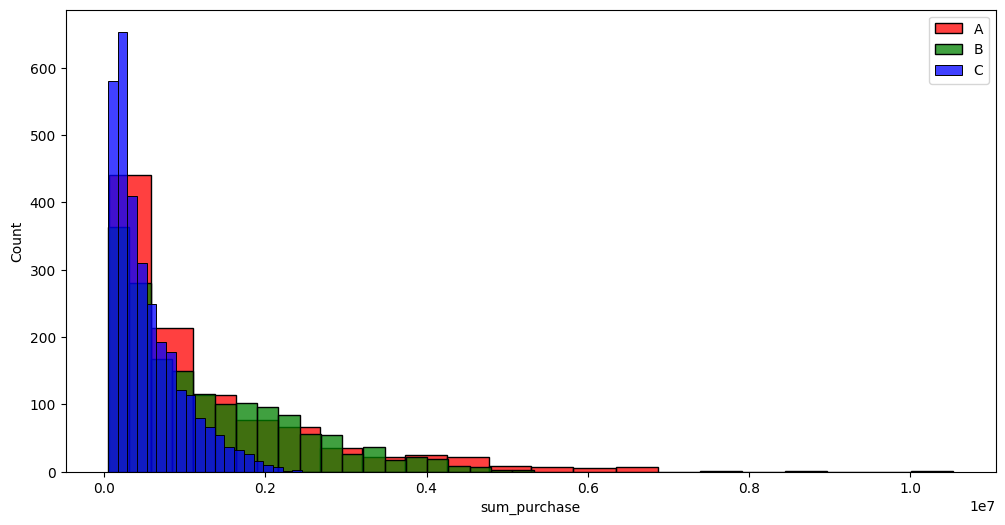

In [ ]:
# Plot a histogram of purchases by City Category
plt.figure(figsize=(12, 6))
sns.histplot(df_test.sum_purchase[df_test.City_Category == 'A'], bins=20, color='r', label='A')
sns.histplot(df_test.sum_purchase[df_test.City_Category == 'B'], bins=20, color='g', label='B')
sns.histplot(df_test.sum_purchase[df_test.City_Category == 'C'], bins=20, color='b', label='C')
plt.legend()
plt.show()

<ipython-input-18-803b287926f8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.City_Category == 'A'], bins=20, color='r', label='A')
<ipython-input-18-803b287926f8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.City_Category == 'B'],

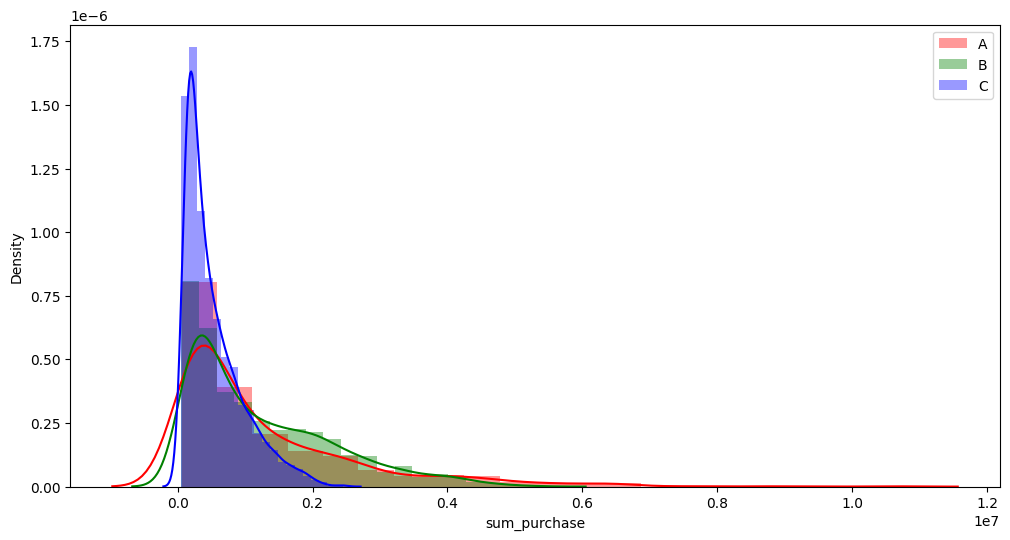

In [ ]:
# Distribution plot for City Category
plt.figure(figsize=(12, 6))
sns.distplot(df_test.sum_purchase[df_test.City_Category == 'A'], bins=20, color='r', label='A')
sns.distplot(df_test.sum_purchase[df_test.City_Category == 'B'], bins=20, color='g', label='B')
sns.distplot(df_test.sum_purchase[df_test.City_Category == 'C'], bins=20, color='b', label='C')
plt.legend()
plt.show()

Here, I examined the spending habits of people from various city categories. The data indicates that customers from City Category A seem to have the highest purchasing power, while City Category B appears to have the largest customer base.

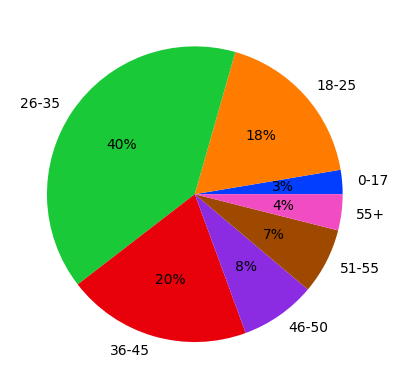

In [ ]:
# Pie chart to show the proportion of total purchases by age group
df_pie = df_test.groupby(['Age']).agg(sum_purchase=('sum_purchase','sum')).reset_index()
palette_color = sns.color_palette('bright')
plt.pie(df_pie.sum_purchase, labels=df_pie.Age, colors=palette_color, autopct='%.0f%%')
plt.show()

<ipython-input-21-4dbfc5bd3510>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Age == '18-25'], bins=20, color='b', label='18-25')
<ipython-input-21-4dbfc5bd3510>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Age == '26-35'], bins=20

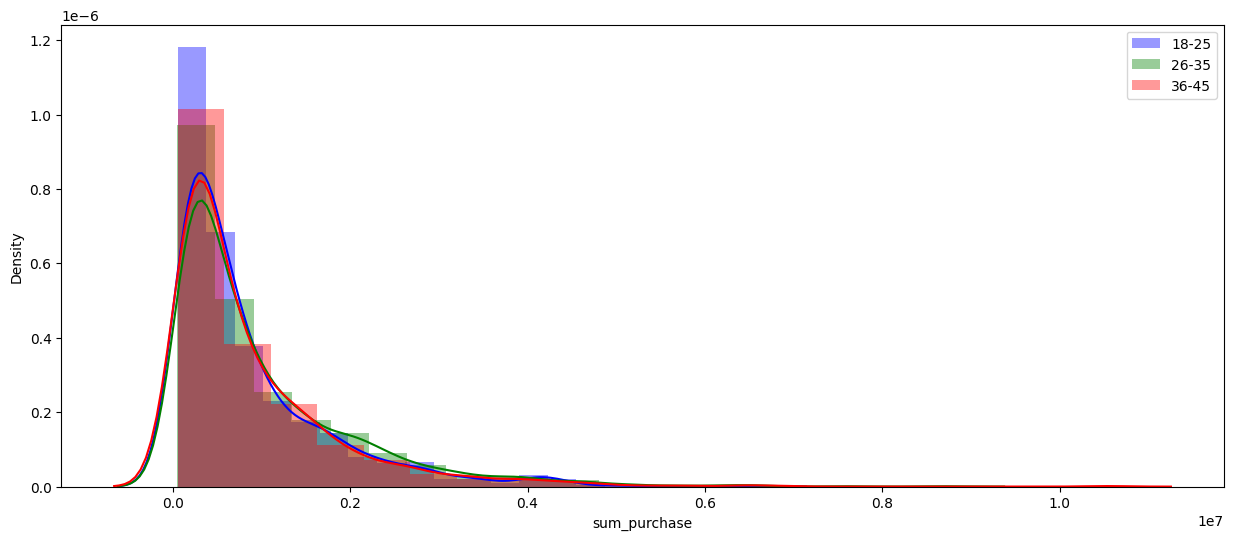

In [ ]:
# Distribution plot for Age and Purchase
plt.figure(figsize=(15, 6))
sns.distplot(df_test.sum_purchase[df_test.Age == '18-25'], bins=20, color='b', label='18-25')
sns.distplot(df_test.sum_purchase[df_test.Age == '26-35'], bins=20, color='g', label='26-35')
sns.distplot(df_test.sum_purchase[df_test.Age == '36-45'], bins=20, color='r', label='36-45')
plt.legend()
plt.show()

 In this step, I utilized a pie chart to compare the spending across different age groups, and distribution plots to analyze the probability of each age group spending certain amounts. The data shows that customers aged 26-35 and 36-45 have the highest spending amounts.

<Axes: xlabel='Occupation', ylabel='count'>

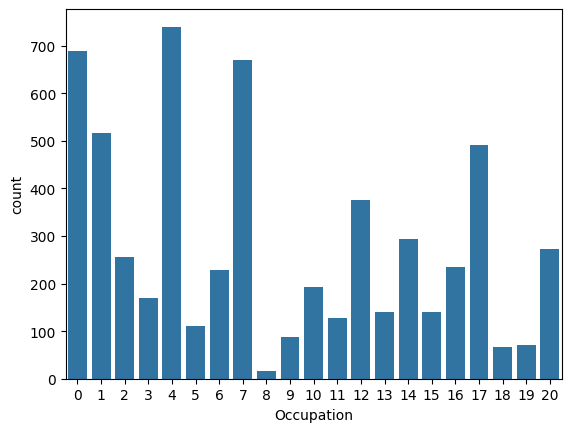

In [ ]:
# Bar plot for different occupations
sns.countplot(x=df_test['Occupation'])

<ipython-input-23-69db733d1e6e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Occupation == 4], bins=20, color='b', label=4)
<ipython-input-23-69db733d1e6e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Occupation == 7], bins=20, co

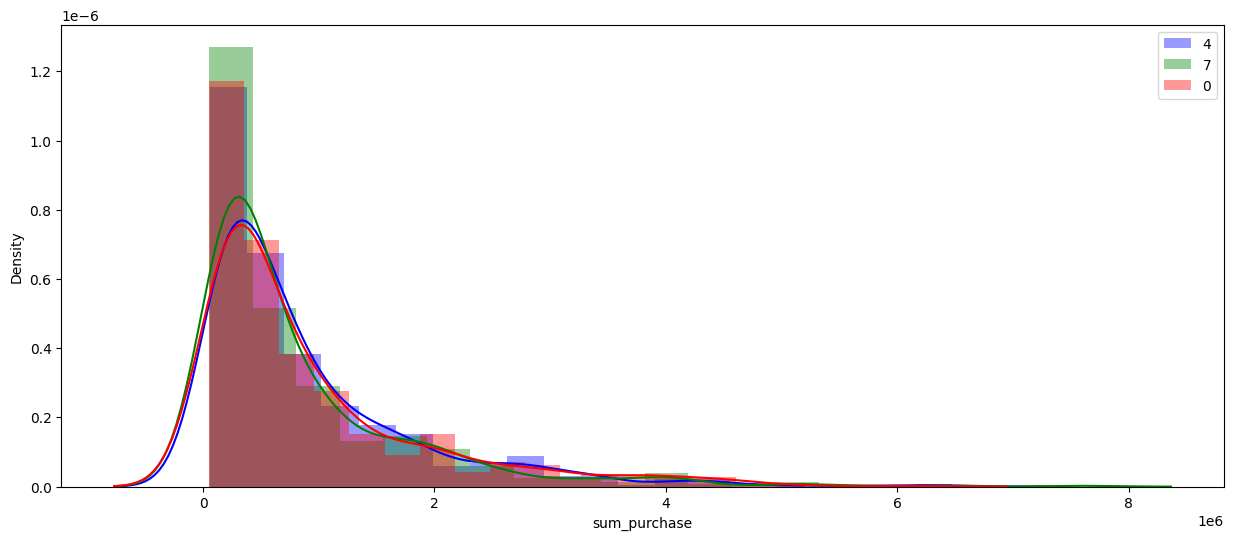

In [ ]:
# Distribution plot for Purchase by Occupation
plt.figure(figsize=(15, 6))
sns.distplot(df_test.sum_purchase[df_test.Occupation == 4], bins=20, color='b', label=4)
sns.distplot(df_test.sum_purchase[df_test.Occupation == 7], bins=20, color='g', label=7)
sns.distplot(df_test.sum_purchase[df_test.Occupation == 0], bins=20, color='r', label=0)
plt.legend()
plt.show()

<Axes: xlabel='Marital_Status', ylabel='count'>

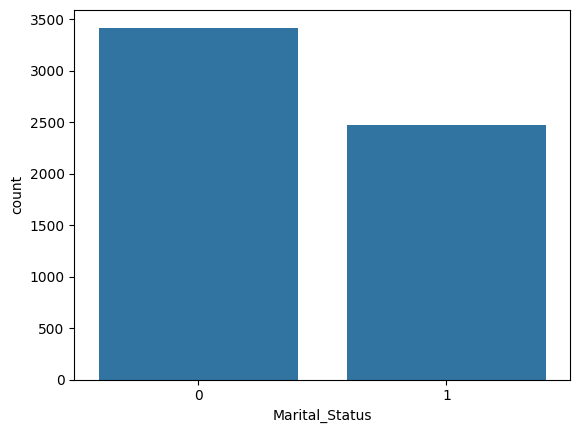

In [ ]:
# Bar plot for Marital Status
sns.countplot(x=df_test['Marital_Status'])

<ipython-input-26-ee4ebc2d0226>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Marital_Status == 0], bins=20, color='b', label=0)
<ipython-input-26-ee4ebc2d0226>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test.sum_purchase[df_test.Marital_Status == 1], bin

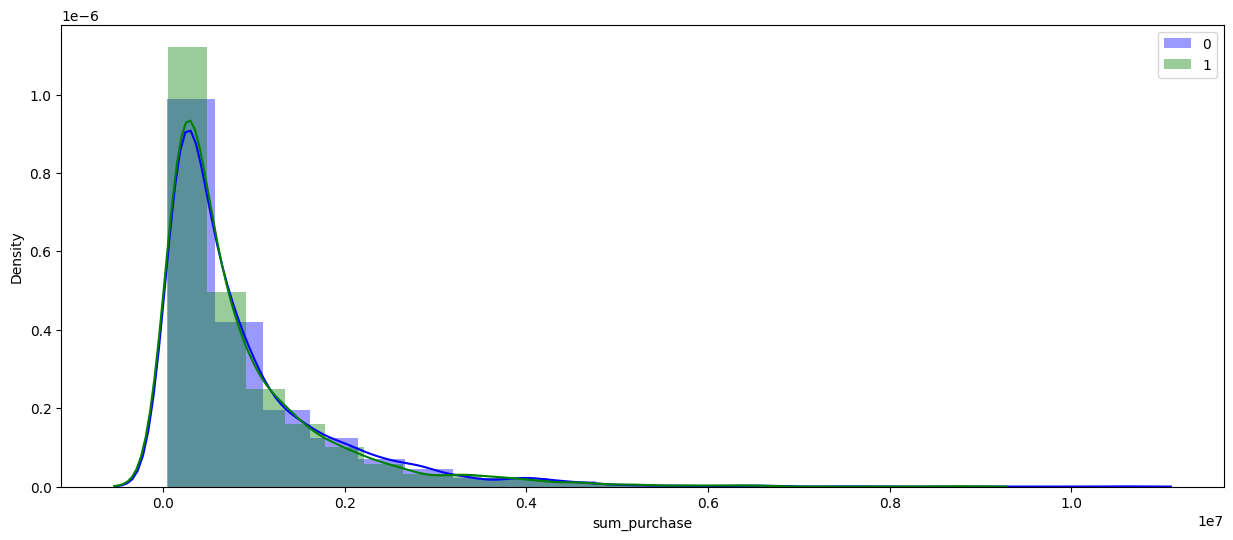

In [ ]:
# Distribution plot for Purchase by Marital Status
plt.figure(figsize=(15, 6))
sns.distplot(df_test.sum_purchase[df_test.Marital_Status == 0], bins=20, color='b', label=0)
sns.distplot(df_test.sum_purchase[df_test.Marital_Status == 1], bins=20, color='g', label=1)
plt.legend()
plt.show()

I examined spending patterns according to different occupations, discovering that those with Occupation 4 and Occupation 0 have the highest spending amounts. Conversely, Marital Status does not seem to significantly impact spending habits.
Based on this analysis, I can deduce that the most lucrative customers are Males aged 26-35 from City Category A, with Occupation 4 or 0. To maximize the number of high-spending customers, the store should focus on attracting these specific demographic groups.

**How EDA Helps Achieve the Objective:**

EDA helps by showing patterns in customer spending, helping us identify which groups (like gender, age, city, and occupation) spend the most. For example, we discovered that **males aged 26-35 from City Category A** are the highest spenders. This answers our question about who the most valuable customers are.

**Future Direction and Decisions:**
- Focus marketing on high-spending customer groups.
- Offer targeted promotions to these customers.
- Explore other factors (like specific products or seasons) that might influence spending in future research.

EDA provides clear insights that guide business strategies and decisions.